Extracted Text from Image:
entree choices

check the li line for chef's specials

orange chicken 490 «a

string bean chicken breast © } 190 cal
kung pao chicken? & 290
mushroom chicken © 220
beijing beef t 410 a

broccoli beef © 150 ca

shanghai angus steak @ 310 «a
honey walnut shrimp ( 360s

additional premium charge:
entree + | kid's entree+ _| family feast entree +



Detected Dishes & Categories:
Orange chicken - Unhealthy
String bean chicken breast - Moderately healthy
Kung pao chicken - Moderately healthy
Mushroom chicken - Moderately healthy
Beijing beef - Unhealthy
Broccoli beef - Moderately healthy
Honey walnut shrimp - Unhealthy


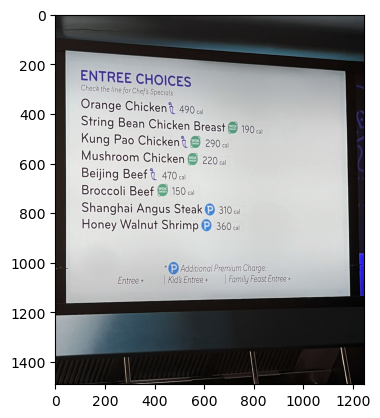

In [3]:
import cv2
import pytesseract
import pandas as pd
import re
from difflib import get_close_matches
import matplotlib.pyplot as plt

# Set Tesseract executable path (Modify if needed)
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the Excel file containing dish classifications
df = pd.read_excel(r'C:\Users\anamt\OneDrive\Desktop\OCR\menu_classification.xlsx')

# Normalize dish names (lowercase, stripped spaces)
df['Dish Name'] = df['Dish Name'].str.lower().str.strip()

# Convert dish names to dictionary for lookup
dish_dict = {row['Dish Name']: row['Category'] for _, row in df.iterrows()}

# Function to classify a dish based on detected text
def classify_dish(dish_name):
    dish_name = dish_name.lower()
    
    # Fuzzy matching to handle OCR errors
    matched_dish = get_close_matches(dish_name, dish_dict.keys(), n=1, cutoff=0.6)  # Adjust cutoff as needed
    if matched_dish:
        return matched_dish[0], dish_dict[matched_dish[0]]
    return None, None  # No match found

# Read the original image
img = cv2.imread('PE M5.png')
plt.imshow(img)

# Extract text **without preprocessing** (original image works better)
extracted_text = pytesseract.image_to_string(img).lower()

# Print raw extracted text for debugging
print("Extracted Text from Image:")
print(extracted_text)

# Remove punctuation for better matching
extracted_text = re.sub(r'[^a-z0-9\s]', '', extracted_text)

# Split into words and match with menu items
found_dishes = []
for line in extracted_text.split("\n"):
    line = line.strip()
    if line:
        matched_name, category = classify_dish(line)
        if matched_name:
            found_dishes.append((matched_name, category))

# Print extracted dish names and their categories
if found_dishes:
    print("\nDetected Dishes & Categories:")
    for dish, category in found_dishes:
        print(f"{dish.capitalize()} - {category.capitalize()}")
else:
    print("\nNo dishes detected. Check extracted text and adjust matching criteria.")
